In [1]:
# ! pip install jupyterlab-tables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from IPython.display import display

Loading the CSV and printing it

In [12]:
dataframe= pd.read_csv('/workspaces/Projects/pl-tables-1993-2024.csv')
# print(dataframe)
display(dataframe)
# manchester_utd_data=dataframe[(dataframe['team']=='Manchester Utd') & (dataframe['team']=='Manchester City')]
# display(manchester_utd_data)

print(dataframe.shape)

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Norwich City,3,42,21,9,12,61,65,-4,72,→ UEFA Cup via league finish 1
3,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
4,1993,QPR,5,42,17,12,13,63,55,8,63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,2024,Brentford,16,38,10,9,19,56,65,-9,39,NaN
642,2024,Nottingham Forest,17,38,9,9,20,49,67,-18,32,4-point deduction
643,2024,Luton Town,18,38,6,8,24,52,85,-33,26,Relegated
644,2024,Burnley,19,38,5,9,24,41,78,-37,24,Relegated


(646, 12)


In [13]:
# x_train=dataframe['gd']
x_train=dataframe.gd.values.reshape(-1,1)
y_train=dataframe['position']
# y_train=dataframe.position
# display(x_train)
# display(y_train)

In [7]:
print(x_train.shape,y_train.shape)

(32, 1) (32,)


In [8]:
soccernicus=LinearRegression()
soccernicus.fit(x_train,y_train)

LinearRegression()

In [9]:
r_sq=soccernicus.score(x_train,y_train)
print(r_sq)

0.6591720269211088


Getting the intercept and the slope


In [8]:
intercept=soccernicus.intercept_
slope=soccernicus.coef_
y_predicted= (slope*x_train)+intercept

Plotting the Graph

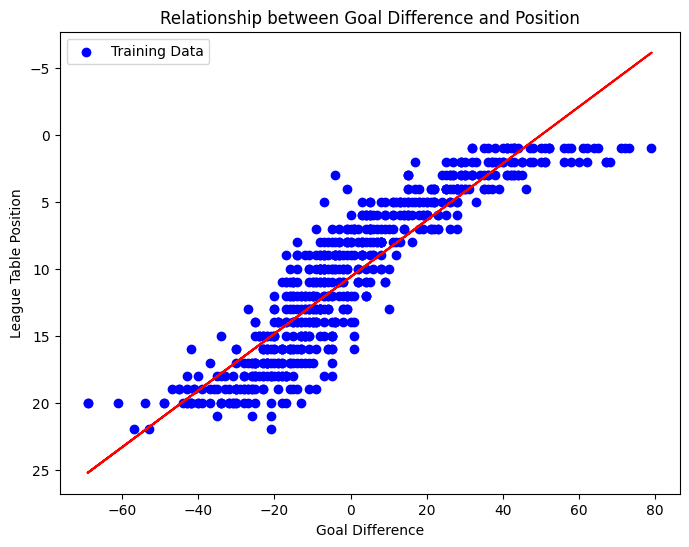

In [29]:
# Create the figure and axis with the specified size
figure, axis = plt.subplots(figsize=(8, 6))

# Scatter plot for training data
# plt.scatter(x_train, y_train, color='blue', label='Training Data')

# Scatter plot for predicted values (if you have predictions, like y_pred)
# This step is optional depending on whether you have predictions to plot
# axis.scatter(x_train, y_pred, color='red', label='Predicted Values')

# Optional regression line (if you have a fitted model)
# axis.plot(x_train, y_pred, color='green', linewidth=2, label='Regression Line')

# Label the axes
axis.set_xlabel('Goal Difference')  # Change to your actual x-axis label
axis.set_ylabel('League Table Position')  # Change to your actual y-axis label

# Set the title
axis.set_title('Relationship between Goal Difference and Position')

# Add a legend
axis.legend()
plt.plot(x_train,y_predicted,c='red')
plt.gca().invert_yaxis()
# Show the plot
plt.show()



In [30]:
import pickle

# Assuming 'model' is your trained model
with open('LinearRegression_Soccer_Model.pkl', 'wb') as f:
    pickle.dump(soccernicus, f)